### EDA

### Import The Libraray

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

### Load the files

In [2]:
data = pd.read_csv("covid19_Confirmed_dataset.csv")
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Aggregate row by country

In [9]:
cr_agg = data.groupby("Country/Region").sum()

C:\Users\asus\AppData\Local\Temp\ipykernel_9776\693646932.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cr_agg = data.groupby("Country/Region").sum()


In [120]:
cr_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_inflection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Visualize the data according to country

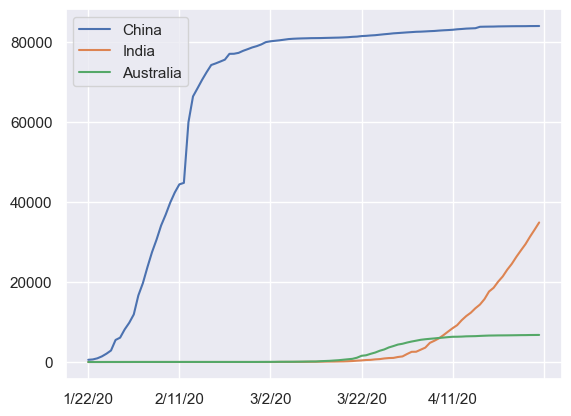

In [11]:
cr_agg.loc['China'].plot()
cr_agg.loc['India'].plot()
cr_agg.loc['Australia'].plot()
plt.legend()

<Axes: >

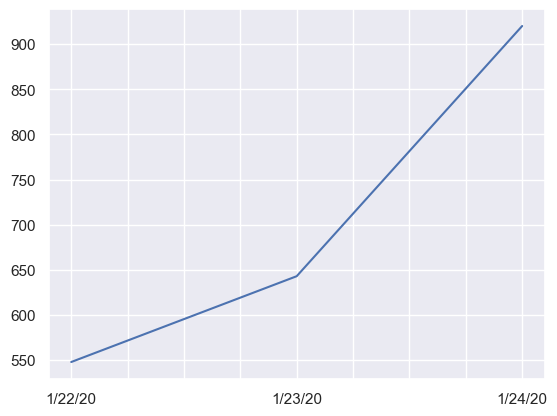

In [12]:
cr_agg.loc["China"][:3].plot()#spreading of crona virus for first 3 days

### Calculate the rate of curve


In [13]:
cr_agg.loc['China'].diff()#diff is derivate of curve it become hectic  to read

1/22/20      NaN
1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
           ...  
4/26/20      3.0
4/27/20      6.0
4/28/20     22.0
4/29/20      4.0
4/30/20     12.0
Name: China, Length: 100, dtype: float64

<Axes: >

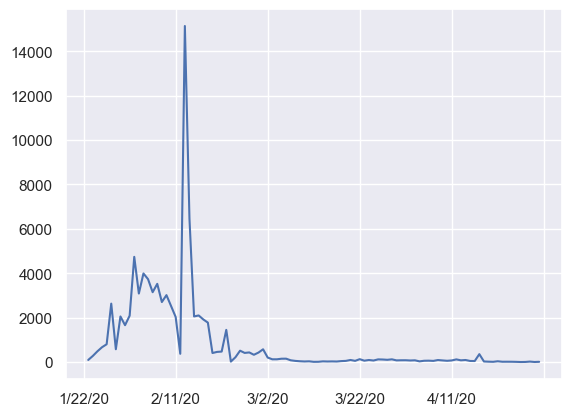

In [14]:
cr_agg.loc['China'].diff().plot()

In [15]:
#calculate maximum inflection rate
cr_agg.loc['China'].diff().max()

15136.0

### calculate maximum inflection rates of all countries

In [16]:
countries = list(cr_agg.index)
max_inflection_rate = []

for c in countries:
    
    max_inflection_rate.append(cr_agg.loc[c].diff().max())
cr_agg["Max_inflection_rate"] = max_inflection_rate

In [35]:
cr_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_inflection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [40]:
corona_data = pd.DataFrame(cr_agg["Max_inflection_rate"])

In [41]:
corona_data

,Max_inflection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


### Load the another dataset


In [20]:
happy = pd.read_csv("worldwide_happiness_report.csv")

In [42]:
happy.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557


In [22]:
data_drop = happy.drop(["Overall rank","Generosity","Perceptions of corruption"],axis = 1 , inplace= True)

In [36]:
happy.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557


### Joininig the two dataset

In [65]:
join_data = corona_data.join(happy,how="outer")
join_data.tail()

,Max_inflection_rate,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
151,NaN,Rwanda,3.334,0.359,0.711,0.614,0.555
152,NaN,Tanzania,3.231,0.476,0.885,0.499,0.417
153,NaN,Afghanistan,3.203,0.350,0.517,0.361,0.000
154,NaN,Central African Republic,3.083,0.026,0.000,0.105,0.225
155,NaN,South Sudan,2.853,0.306,0.575,0.295,0.010


In [114]:
join_data.corr()

C:\Users\asus\AppData\Local\Temp\ipykernel_9776\448169993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  join_data.corr()


,Max_inflection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_inflection_rate,1.0,NaN,NaN,NaN,NaN,NaN
Score,NaN,1.000000,0.793883,0.777058,0.779883,0.566742
GDP per capita,NaN,0.793883,1.000000,0.754906,0.835462,0.379079
Social support,NaN,0.777058,0.754906,1.000000,0.719009,0.447333
Healthy life expectancy,NaN,0.779883,0.835462,0.719009,1.000000,0.390395
Freedom to make life choices,NaN,0.566742,0.379079,0.447333,0.390395,1.000000


### Visulization between Max_inflection_rate and GDP per capita

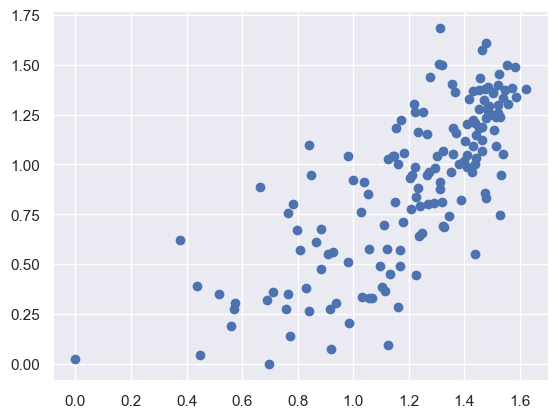

In [119]:
xx = join_data["Social support"]
yy = join_data["GDP per capita"]
plt.scatter(xx,yy)
plt.show()
